# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/dialects_data.csv')
print(df.shape)
df.head()

(147725, 3)


,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


In [4]:
df_copy = df.copy()

In [5]:
df_copy.isnull().sum()

id         0
text       0
dialect    0
dtype: int64

<AxesSubplot: >

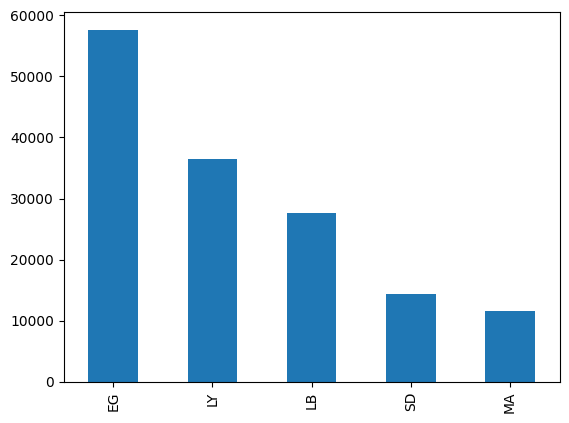

In [6]:
df_copy['dialect'].value_counts().plot(kind='bar')
# Conclusion: The dataset is imbalanced towards the dialect 'EG', which means that the accuracy of the model will be biased,
# hence the metric to be used should be F1 score.

In [7]:
arabic_digits = '٠١٢٣٤٥٦٧٨٩'
df_copy['text'].apply(lambda x: any([char in arabic_digits for char in x])).sum()
# numbers/digits are useless in this context, of identifying the dialect of the text, so they should be removed.

2771

In [8]:
arabic_punctuations = '؛،؟,”“'
df_copy['text'].apply(lambda x: any([char in arabic_punctuations for char in x])).sum()
# punctuations are also useless in this context.


20535

In [9]:
import string

print(string.digits + arabic_digits)
print(string.punctuation + arabic_punctuations)



0123456789٠١٢٣٤٥٦٧٨٩
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~؛،؟,”“


In [10]:
import string
import re


class Preprocess():
    def __init__(self, df):
        self.df = df

    def __remove_newline(self, text):
        return text.replace('\n', ' ')
    
    def __remove_punctuation(self, text):
        arabic_punctuations = '؛،؟”“'
        all_punctuations = string.punctuation + arabic_punctuations
        return text.translate(str.maketrans('', '', all_punctuations))
    
    def __remove_digits(self, text):
        arabic_digits = '٠١٢٣٤٥٦٧٨٩'
        all_digits = string.digits + arabic_digits
        return text.translate(str.maketrans('', '', all_digits))
    
    def __remove_mentions(self, text):
        return ' '.join([word for word in text.split() if not word.startswith('@')])
    
    def __remove_links(self, text):
        return ' '.join([word for word in text.split() if not word.startswith('http')])
    
    def __remove_emojis(self, text):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002500-\U00002BEF"
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)


    def __remove_english(self, text):
        english_alphabets = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
        return ' '.join([word for word in text.split() if not any(char in english_alphabets for char in word)])
    
    def preprocess(self):
        self.df['text'] = self.df['text'].apply(self.__remove_newline)
        self.df['text'] = self.df['text'].apply(self.__remove_mentions)
        self.df['text'] = self.df['text'].apply(self.__remove_links)
        self.df['text'] = self.df['text'].apply(self.__remove_emojis)
        self.df['text'] = self.df['text'].apply(self.__remove_punctuation)
        self.df['text'] = self.df['text'].apply(self.__remove_digits)
        self.df['text'] = self.df['text'].apply(self.__remove_english)
        return self.df



In [11]:
def remove_mentions(text):
    return ' '.join([word for word in text.split() if not word.startswith('@')])

remove_mentions('@ahmed hello @mohamed')

'hello'

In [12]:
df_copy.head()

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


In [13]:
print(df_copy['text'][1])

@AlmFaisal 😂😂 الليبيين متقلبين!!!
بس بالنسبة ليا انا ميليشياوي زمان وتوة


In [14]:
df_preprocessed = Preprocess(df_copy)
df_preprocessed = df_preprocessed.preprocess()
df_preprocessed.head()

,id,text,dialect
0,1009754958479151232,قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاكس...,LY
1,1009794751548313600,الليبيين متقلبين بس بالنسبة ليا انا ميليشياوي ...,LY
2,1019989115490787200,كل تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ ان...,LY
3,1035479791758135168,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل...,LY
4,1035481122921164800,شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتي...,LY
